In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
import seaborn
import json

#Set debug = True to print out variable values for verification:
debug = False

In [2]:
def draw_hist(alldata, numbins=25, mybins=None, density=False, stacked=False,
              xlabel=None, xlim=None, xticks=None, xticklabs=None,
              ylabel=None, ylim=None, yticks=None, yticklabs=None,
              palette=None, Title=None):
    if not mybins:
        mybins = numbins
        if xlim:
            mybins = np.linspace(xlim[0], xlim[1], numbins)

    fig, ax = plt.subplots()
    
    plot = ax.hist(alldata, bins=mybins, color=palette, density=density, stacked=stacked,
                   label=["Old All", "New All", "Mapped", "Old Unique", "New Unique"])

    if xlabel is not None:
        _ = ax.set_xlabel(xlabel)
    if xticks is not None:
        _ = ax.set_xticks(xticks)
    if xticklabs is not None:
        _ = ax.set_xticklabels(xticklabs)
    if ylabel is not None:
        _ = ax.set_ylabel(ylabel)
    if yticks is not None:
        _ = ax.set_yticks(yticks)
    if yticklabs is not None:
        _ = ax.set_yticklabels(yticklabs)
    if xlim:
        _ = ax.set_xlim(xlim[0], xlim[1])
    if ylim:
        _ = ax.set_ylim(ylim[0], ylim[1])
    _ = ax.legend(loc='upper right', ncol=1, fontsize=16)
    # Cleanup
    seaborn.despine(left=True)
    if Title is not None:
        _ = matplotlib.pyplot.title(Title, fontsize=24)
        _ = matplotlib.pyplot.suptitle("")
    else:
        _ = matplotlib.pyplot.title("")
        _ = matplotlib.pyplot.suptitle("")

In [3]:
#Importing status counts, query/subject relations, and iLoci information
# from external files:
#
iltypes = ['ci','fi','ii','ni','si']


#For Arabidopsis thaliana: variables statuscountsAtt6 etc. contain the results
# of mapping Att6 onto Atha; variables statuscountsAtha etc. contain the
# results of the reverse mapping, Atha onto Att6

statuscountsAtt6 = {}
qsrelationsAtt6  = {}
qsrelationsAtt6['all'] = {}
statuscountsAtha = {}
qsrelationsAtha  = {}
qsrelationsAtha['all'] = {}

for iltype in iltypes:
    with open('../comparisons/Atha/Att6.' + iltype + 'loci-vs-Atha.summary.counts', 'r') as f:
        statuscountsAtt6[iltype] = json.load(f)
    with open('../comparisons/Atha/Atha.' + iltype + 'loci-vs-Att6.summary.counts', 'r') as f:
        statuscountsAtha[iltype] = json.load(f)
    if debug:
        print("\n\nstatuscountsAtha %sloci:\n" % iltype)
        print(statuscountsAtha[iltype])
    with open('../comparisons/Atha/Att6.' + iltype + 'loci-vs-Atha.summary.qsrelations', 'r') as f:
        qsrelationsAtt6[iltype] = json.load(f)
        qsrelationsAtt6['all'].update(qsrelationsAtt6[iltype])        
    with open('../comparisons/Atha/Atha.' + iltype + 'loci-vs-Att6.summary.qsrelations', 'r') as f:
        qsrelationsAtha[iltype] = json.load(f)
        qsrelationsAtha['all'].update(qsrelationsAtha[iltype])        
    if debug:
        print("\n\nAtha %sloci-qsrelations" % iltype)
        print(qsrelationsAtha[iltype])

ilociAtt6 = pd.read_csv('../comparisons/Atha/Att6.iloci.tsv',sep='\t')
ilociAtha = pd.read_csv('../comparisons/Atha/Atha.iloci.tsv',sep='\t')
ilociAtt6['LogLength'] = np.log10(ilociAtt6['Length'])
ilociAtha['LogLength'] = np.log10(ilociAtha['Length'])



#For Apis mellifera: variables statuscountsAm45 etc. contain the results
# of mapping Am45 onto Amel; variables statuscountsAmel etc. contain the
# results of the reverse mapping, Amel onto Am45

statuscountsAm45 = {}
qsrelationsAm45 = {}
qsrelationsAm45['all'] = {}
statuscountsAmel = {}
qsrelationsAmel  = {}
qsrelationsAmel['all'] = {}

for iltype in iltypes:
    with open('../comparisons/Amel/Am45.' + iltype + 'loci-vs-Amel.summary.counts', 'r') as f:
        statuscountsAm45[iltype] = json.load(f)
    with open('../comparisons/Amel/Amel.' + iltype + 'loci-vs-Am45.summary.counts', 'r') as f:
        statuscountsAmel[iltype] = json.load(f)
    if debug:
        print("\n\nstatuscountsAmel %sloci:\n" % iltype)
        print(statuscountsAmel[iltype])

    with open('../comparisons/Amel/Am45.' + iltype + 'loci-vs-Amel.summary.qsrelations', 'r') as f:
        qsrelationsAm45[iltype] = json.load(f)
        qsrelationsAm45['all'].update(qsrelationsAm45[iltype])
    with open('../comparisons/Amel/Amel.' + iltype + 'loci-vs-Am45.summary.qsrelations', 'r') as f:
        qsrelationsAmel[iltype] = json.load(f)
        qsrelationsAmel['all'].update(qsrelationsAmel[iltype])
    if debug:
        print("\n\nAmel %sloci-qsrelations" % iltype)
        print(qsrelationsAmel[iltype])

ilociAm45 = pd.read_csv('../comparisons/Amel/Am45.iloci.tsv',sep='\t')
ilociAmel = pd.read_csv('../comparisons/Amel/Amel.iloci.tsv',sep='\t')
ilociAm45['LogLength'] = np.log10(ilociAm45['Length'])
ilociAmel['LogLength'] = np.log10(ilociAmel['Length'])


if debug:
    print("\n\nilociAm45:\n")
    print(ilociAm45)
    print("\n\niLociAm45 iiLoci only:\n")
    print(ilociAmel[ilociAmel.LocusClass == "iiLocus"])

    print("\n\nilociAtha:\n")
    print(ilociAtha)
    print("\n\niLociAtha iiLoci only:\n")
    print(ilociAtha[ilociAtha.LocusClass == "iiLocus"])
    
    print("\n\nqsrelationsAm45:\n")
    print(len(qsrelationsAm45['all']))
    print("\n\nSample entries:\n\n")
    for i in range(4):
        print("key: ", list(qsrelationsAm45['all'])[i], "\t",
              "value: ", qsrelationsAm45['all'].get(list(qsrelationsAm45['all'])[i]))

In [4]:
#Arabidopsis iLoci mapping status

mydf = pd.DataFrame(data = statuscountsAtt6)
mydf['all i'] = mydf.sum(axis=1)
Att6VsAtha = mydf.transpose()
Att6VsAtha.columns = Att6VsAtha.columns.str.replace('qloci_','')
Att6VsAtha.index = Att6VsAtha.index.str.replace('i','iLoci')
Att6VsAtha = Att6VsAtha.rename(index={'iLociiLoci':'iiLoci'}, columns={'wohits':'w/o hits'})
Att6VsAtha = Att6VsAtha[['all','w/o hits','unmapped','mapped','conserved','unconserved','contained','anchored','redefined']]
Att6VsAtha = Att6VsAtha.loc[ ['siLoci', 'niLoci', 'ciLoci', 'iiLoci', 'fiLoci', 'all iLoci'], :]
print("\n\nAtt6 iLoci mapped to Atha:")
display(Att6VsAtha)  
tablefp = open("../tables/LSB20GB-SuppTable6a-mapping-Atha.tex", "wt")
tablefp.write(Att6VsAtha.to_latex(index=True))
tablefp.close()  
    
mydf = pd.DataFrame(data = statuscountsAtha)
mydf['all i'] = mydf.sum(axis=1)
AthaVsAtt6 = mydf.transpose()
AthaVsAtt6.columns = AthaVsAtt6.columns.str.replace('qloci_','')
AthaVsAtt6.index = AthaVsAtt6.index.str.replace('i','iLoci')
AthaVsAtt6 = AthaVsAtt6.rename(index={'iLociiLoci':'iiLoci'}, columns={'wohits':'w/o hits'})
AthaVsAtt6 = AthaVsAtt6[['all','w/o hits','unmapped','mapped','conserved','unconserved','contained','anchored','redefined']]
AthaVsAtt6 = AthaVsAtt6.loc[ ['siLoci', 'niLoci', 'ciLoci', 'iiLoci', 'fiLoci', 'all iLoci'], :]
print("\n\nAtha iLoci mapped to Att6:")
display(AthaVsAtt6)
tablefp = open("../tables/LSB20GB-SuppTable6b-mapping-Atha.tex", "wt")
tablefp.write(AthaVsAtt6.to_latex(index=True))
tablefp.close()



Att6 iLoci mapped to Atha:


,all,w/o hits,unmapped,mapped,conserved,unconserved,contained,anchored,redefined
siLoci,26504,3,152,26349,18115,8234,7269,815,150
niLoci,769,0,2,767,690,77,52,21,4
ciLoci,20,0,0,20,11,9,4,5,0
iiLoci,9997,13,1210,8774,3085,5689,1354,4266,69
fiLoci,9,0,1,8,4,4,1,3,0
all iLoci,37299,16,1365,35918,21905,14013,8680,5110,223




Atha iLoci mapped to Att6:


,all,w/o hits,unmapped,mapped,conserved,unconserved,contained,anchored,redefined
siLoci,26819,2,668,26149,17989,8160,1489,6645,26
niLoci,5111,6,1513,3592,820,2772,2318,448,6
ciLoci,307,0,8,299,139,160,11,147,2
iiLoci,8244,27,62,8155,3042,5113,4637,408,68
fiLoci,7,2,0,5,3,2,2,0,0
all iLoci,40488,37,2251,38200,21993,16207,8457,7648,102


In [5]:
#Apis mellifera mapping status

mydf = pd.DataFrame(data = statuscountsAm45)
mydf['all i'] = mydf.sum(axis=1)
Am45VsAmel = mydf.transpose()
Am45VsAmel.columns = Am45VsAmel.columns.str.replace('qloci_','')
Am45VsAmel.index = Am45VsAmel.index.str.replace('i','iLoci')
Am45VsAmel = Am45VsAmel.rename(index={'iLociiLoci':'iiLoci'}, columns={'wohits':'w/o hits'})
Am45VsAmel = Am45VsAmel[['all','w/o hits','unmapped','mapped','conserved','unconserved','contained','anchored','redefined']]
Am45VsAmel = Am45VsAmel.loc[ ['siLoci', 'niLoci', 'ciLoci', 'iiLoci', 'fiLoci', 'all iLoci'], :]
print("\n\nAmel4.5 iLoci mapped to AmelHAv3.1:")
display(Am45VsAmel)
tablefp = open("../tables/LSB20GB-SuppTable6c-mapping-Amel.tex", "wt")
tablefp.write(Am45VsAmel.to_latex(index=True))
tablefp.close()
    

mydf = pd.DataFrame(data = statuscountsAmel)
mydf['all i'] = mydf.sum(axis=1)
AmelVsAm45 = mydf.transpose()
AmelVsAm45.columns = AmelVsAm45.columns.str.replace('qloci_','')
AmelVsAm45.index = AmelVsAm45.index.str.replace('i','iLoci')
AmelVsAm45 = AmelVsAm45.rename(index={'iLociiLoci':'iiLoci'}, columns={'wohits':'w/o hits'})
AmelVsAm45 = AmelVsAm45[['all','w/o hits','unmapped','mapped','conserved','unconserved','contained','anchored','redefined']]
AmelVsAm45 = AmelVsAm45.loc[ ['siLoci', 'niLoci', 'ciLoci', 'iiLoci', 'fiLoci', 'all iLoci'], :]
print("\n\nAmelHAv3.1 iLoci mapped to Amel4.5:")
display(AmelVsAm45)
tablefp = open("../tables/LSB20GB-SuppTable6d-mapping-Amel.tex", "wt")
tablefp.write(AmelVsAm45.to_latex(index=True))
tablefp.close()



Amel4.5 iLoci mapped to AmelHAv3.1:


,all,w/o hits,unmapped,mapped,conserved,unconserved,contained,anchored,redefined
siLoci,9895,280,551,9064,6549,2515,1708,665,142
niLoci,3083,30,268,2785,973,1812,1434,220,158
ciLoci,387,1,6,380,234,146,31,84,31
iiLoci,4165,292,653,3220,1367,1853,1209,627,17
fiLoci,5003,890,620,3493,5,3488,3435,47,6
all iLoci,22533,1493,2098,18942,9128,9814,7817,1643,354




AmelHAv3.1 iLoci mapped to Amel4.5:


,all,w/o hits,unmapped,mapped,conserved,unconserved,contained,anchored,redefined
siLoci,9306,36,435,8835,6554,2281,815,1248,218
niLoci,2289,15,158,2116,983,1133,701,213,219
ciLoci,354,1,3,350,232,118,14,86,18
iiLoci,3778,315,354,3109,1356,1753,876,780,97
fiLoci,218,36,35,147,2,145,2,125,18
all iLoci,15945,403,985,14557,9127,5430,2408,2452,570


        conserved  contained  anchored  redefined  Unique to TAIR6
siLoci      18115       7269       815        150              155
iiLoci       3085       1354      4266         69             1223
niLoci        690         52        21          4                2
ciLoci         11          4         5          0                0
fiLoci          4          1         3          0                1


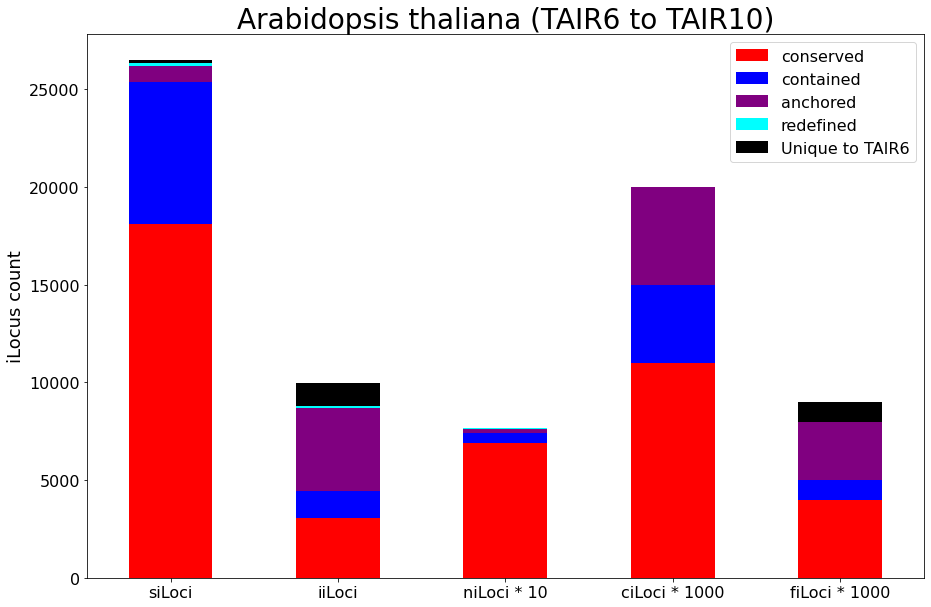

In [6]:
#Visualization of Arabidopsis iLoci mapping status: TAIR6 to TAIR10

Att6VsAtha['Unique to TAIR6'] = Att6VsAtha['w/o hits'] + Att6VsAtha['unmapped']
bdf = Att6VsAtha.loc[['siLoci', 'iiLoci', 'niLoci', 'ciLoci', 'fiLoci'],
                     ['conserved', 'contained', 'anchored', 'redefined', 'Unique to TAIR6']]
print(bdf)

#We multiply small number for purposes of visualization on the same plot,
# changing the index names appropriately:
bdf.loc[['niLoci'], :] = 10 * bdf.loc[['niLoci'], :]
bdf.loc[['ciLoci', 'fiLoci'], :] = 1000 * bdf.loc[['ciLoci', 'fiLoci'], :]
bdf = bdf.rename(index = {'niLoci' : 'niLoci * 10',
                'ciLoci' : 'ciLoci * 1000', 'fiLoci' : 'fiLoci * 1000'})

plot = bdf.plot.bar(stacked = True, color = ['red','blue', 'purple', 'cyan', 'black'],
                    fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Arabidopsis thaliana (TAIR6 to TAIR10)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus count')
_ = plot.yaxis.label.set_fontsize(18)
plotfile = "../figures/LSB20GB-Fig5a.png"
plt.savefig(plotfile)
_ = plt.show()

        conserved  contained  anchored  redefined  Unique to TAIR10
siLoci      17989       1489      6645         26               670
iiLoci       3042       4637       408         68                89
niLoci        820       2318       448          6              1519
ciLoci        139         11       147          2                 8
fiLoci          3          2         0          0                 2


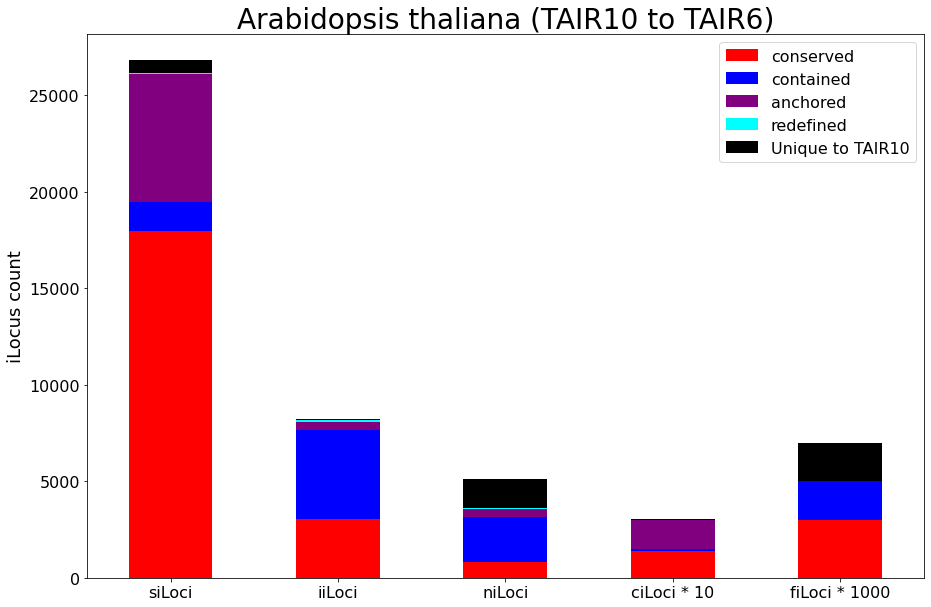

In [7]:
#Visualization of Arabidopsis iLoci mapping status: TAIR10 to TAIR6

AthaVsAtt6['Unique to TAIR10'] = AthaVsAtt6['w/o hits'] + AthaVsAtt6['unmapped']
bdf = AthaVsAtt6.loc[['siLoci', 'iiLoci', 'niLoci', 'ciLoci', 'fiLoci'],
                     ['conserved', 'contained', 'anchored', 'redefined', 'Unique to TAIR10']]
print(bdf)

#We multiply small number for purposes of visualization on the same plot,
# changing the index names appropriately:
bdf.loc[['ciLoci'], :] = 10 * bdf.loc[['ciLoci'], :]
bdf.loc[['fiLoci'], :] = 1000 * bdf.loc[['fiLoci'], :]
bdf = bdf.rename(index = {'ciLoci' : 'ciLoci * 10', 'fiLoci' : 'fiLoci * 1000'})

plot = bdf.plot.bar(stacked = True, color = ['red','blue', 'purple', 'cyan', 'black'],
                    fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Arabidopsis thaliana (TAIR10 to TAIR6)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus count')
_ = plot.yaxis.label.set_fontsize(18)

        conserved  contained  anchored  redefined  Unique to Amel4.5
siLoci       6549       1708       665        142                831
iiLoci       1367       1209       627         17                945
niLoci        973       1434       220        158                298
ciLoci        234         31        84         31                  7
fiLoci          5       3435        47          6               1510


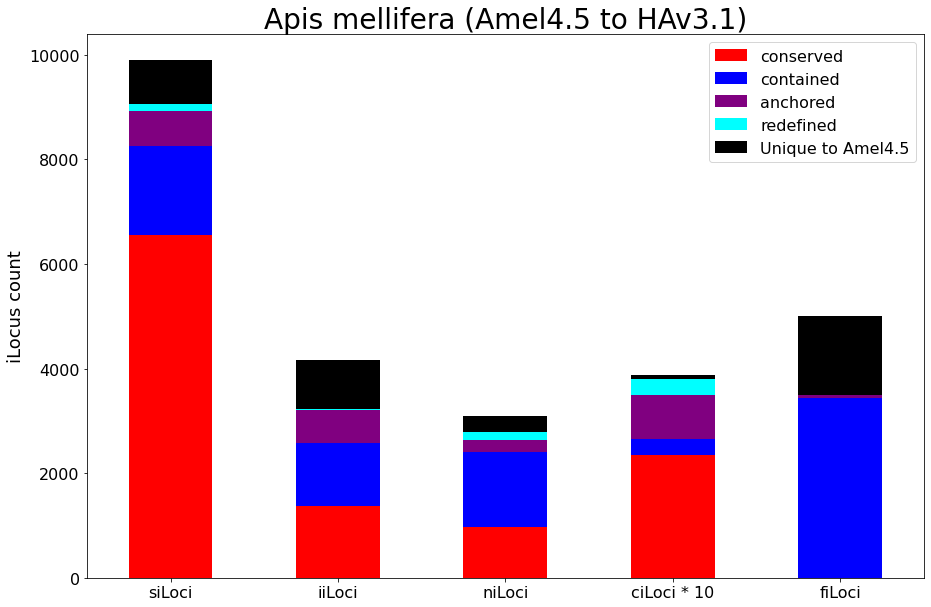

In [8]:
#Visualization of Apis mellifera iLoci mapping status: 4.5 to HAv3.1

Am45VsAmel['Unique to Amel4.5'] = Am45VsAmel['w/o hits'] + Am45VsAmel['unmapped']
bdf = Am45VsAmel.loc[['siLoci', 'iiLoci', 'niLoci', 'ciLoci', 'fiLoci'],
                     ['conserved', 'contained', 'anchored', 'redefined', 'Unique to Amel4.5']]
print(bdf)

#We multiply small number for purposes of visualization on the same plot,
# changing the index names appropriately:
bdf.loc[['ciLoci'], :] = 10 * bdf.loc[['ciLoci'], :]
bdf = bdf.rename(index = {'ciLoci' : 'ciLoci * 10'})

plot = bdf.plot.bar(stacked = True, color = ['red','blue', 'purple', 'cyan', 'black'],
                    fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Apis mellifera (Amel4.5 to HAv3.1)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus count')
_ = plot.yaxis.label.set_fontsize(18)
plotfile = "../figures/LSB20GB-Fig5b.png"
plt.savefig(plotfile)
_ = plt.show()

        conserved  contained  anchored  redefined  Unique to AmelHAv3.1
siLoci       6554        815      1248        218                   471
iiLoci       1356        876       780         97                   669
niLoci        983        701       213        219                   173
ciLoci        232         14        86         18                     4
fiLoci          2          2       125         18                    71


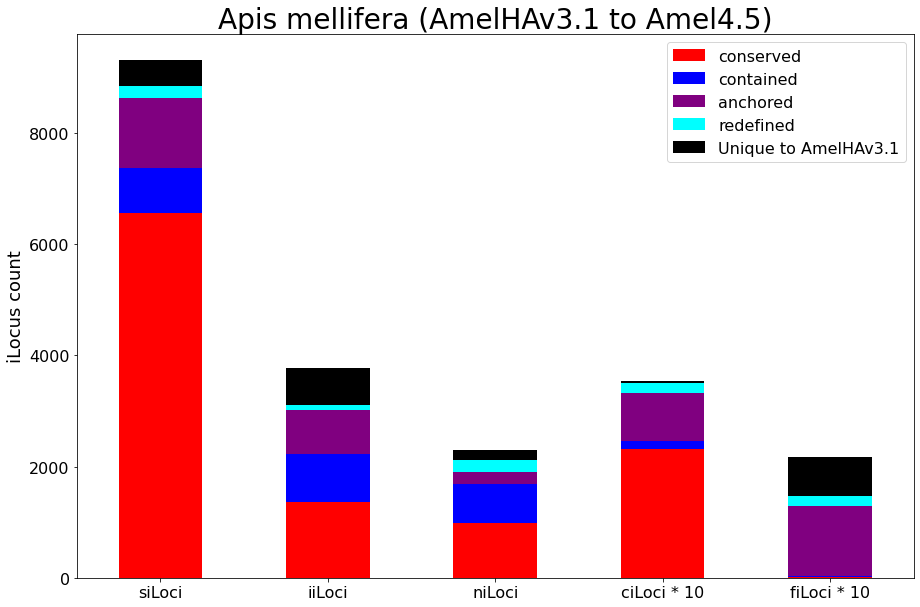

In [9]:
#Visualization of Apis mellifera iLoci mapping status: HAv3.1 to 4.5

AmelVsAm45['Unique to AmelHAv3.1'] = AmelVsAm45['w/o hits'] + AmelVsAm45['unmapped']
bdf = AmelVsAm45.loc[['siLoci', 'iiLoci', 'niLoci', 'ciLoci', 'fiLoci'],
                     ['conserved', 'contained', 'anchored', 'redefined', 'Unique to AmelHAv3.1']]
print(bdf)

#We multiply small number for purposes of visualization on the same plot,
# changing the index names appropriately:
bdf.loc[['ciLoci'], :] = 10 * bdf.loc[['ciLoci'], :]
bdf.loc[['fiLoci'], :] = 10 * bdf.loc[['fiLoci'], :]
bdf = bdf.rename(index = {'ciLoci' : 'ciLoci * 10', 'fiLoci' : 'fiLoci * 10'})

plot = bdf.plot.bar(stacked = True, color = ['red','blue', 'purple', 'cyan', 'black'],
                    fontsize=16, rot=0, figsize=(15,10))
_ = plot.set_title("Apis mellifera (AmelHAv3.1 to Amel4.5)", fontsize = 28)
_ = plot.legend(prop={'size': 16})
_ = plt.xlabel('')
_ = plt.ylabel('iLocus count')
_ = plot.yaxis.label.set_fontsize(18)

In [10]:
#Exploring target iLocus type for mapped Att6 iLoci

z = zip(ilociAtha['LocusId'], ilociAtha['LocusClass'])
AthaLC = dict(z)

qltypes = ['si', 'ni', 'ci', 'ii', 'fi']
sttypes = ['conserved', 'contained_in', 'anchored_by', 'redefined_to']
iltypes = ['siLocus', 'niLocus', 'ciLocus', 'iiLocus', 'fiLocus']

myd = {}
for qltype in qltypes:
    q = qsrelationsAtt6[qltype]
    for status in sttypes:
        qs = { key:value for key, value in q.items() if value[0] == status }
        qsl = list(qs.values())
        ftarget = [el[1] for el in qsl]
        targetclass = []
        for i in range(0,len(ftarget)):
            targetclass.append(AthaLC[ftarget[i]])
        tmpl = [len(ftarget)]
        for iltype in iltypes:
            tmpl.append(len([i for i, x in enumerate(targetclass) if x == iltype]))
        myd.update({qltype + '-' + status : tmpl})

mydf = pd.DataFrame.from_dict(myd,orient = 'index')
mydf.columns = ['All'] + iltypes

mydf = mydf.rename(index = {'si-conserved' : 'TAIR6 siLoci conserved',
                            'si-contained_in' : 'contained in',
                            'si-anchored_by' : 'anchored by',
                            'si-redefined_to' : 'redefined to',
                            'ni-conserved' : 'TAIR6 niLoci conserved',
                            'ni-contained_in' : 'contained in',
                            'ni-anchored_by' : 'anchored by',
                            'ni-redefined_to' : 'redefined to',
                            'ci-conserved' : 'TAIR6 ciLoci conserved',
                            'ci-contained_in' : 'contained in',
                            'ci-anchored_by' : 'anchored by',
                            'ci-redefined_to' : 'redefined to',
                            'ii-conserved' : 'TAIR6 iiLoci conserved',
                            'ii-contained_in' : 'contained in',
                            'ii-anchored_by' : 'anchored by',
                            'ii-redefined_to' : 'redefined to',
                            'fi-conserved' : 'TAIR6 fiLoci conserved',
                            'fi-contained_in' : 'contained in',
                            'fi-anchored_by' : 'anchored by',
                            'fi-redefined_to' : 'redefined to'
                   },
                  columns = {'siLocus' : 'TAIR10 siLocus', 'niLocus' : 'TAIR10 niLocus',
                             'ciLocus' : 'TAIR10 ciLocus', 'iiLocus' : 'TAIR10 iiLocus',
                             'fiLocus' : 'TAIR10 fiLocus'})
display(mydf)
tablefp = open("../tables/LSB20GB-SuppTable7a-conservation-Atha.tex", "wt")
tablefp.write(mydf.to_latex(index=True))
tablefp.close()

,All,TAIR10 siLocus,TAIR10 niLocus,TAIR10 ciLocus,TAIR10 iiLocus,TAIR10 fiLocus
TAIR6 siLoci conserved,18115,17939,38,132,6,0
contained in,7269,6437,25,178,629,0
anchored by,815,712,46,1,56,0
redefined to,150,129,2,2,17,0
TAIR6 niLoci conserved,690,0,690,0,0,0
contained in,52,8,43,0,1,0
anchored by,21,2,18,0,1,0
redefined to,4,3,0,1,0,0
TAIR6 ciLoci conserved,11,4,0,7,0,0
contained in,4,0,1,2,1,0


In [11]:
#Exploring target iLocus type for mapped Atha iLoci

z = zip(ilociAtt6['LocusId'], ilociAtt6['LocusClass'])
Att6LC = dict(z)

qltypes = ['si', 'ni', 'ci', 'ii', 'fi']
sttypes = ['conserved', 'contained_in', 'anchored_by', 'redefined_to']
iltypes = ['siLocus', 'niLocus', 'ciLocus', 'iiLocus', 'fiLocus']

myd = {}
for qltype in qltypes:
    q = qsrelationsAtha[qltype]
    for status in sttypes:
        qs = { key:value for key, value in q.items() if value[0] == status }
        qsl = list(qs.values())
        ftarget = [el[1] for el in qsl]
        targetclass = []
        for i in range(0,len(ftarget)):
            targetclass.append(Att6LC[ftarget[i]])
        tmpl = [len(ftarget)]
        for iltype in iltypes:
            tmpl.append(len([i for i, x in enumerate(targetclass) if x == iltype]))
        myd.update({qltype + '-' + status : tmpl})
        
mydf = pd.DataFrame.from_dict(myd,orient = 'index')
mydf.columns = ['All'] + iltypes

mydf = mydf.rename(index = {'si-conserved' : 'TAIR10 siLoci conserved',
                            'si-contained_in' : 'contained in',
                            'si-anchored_by' : 'anchored by',
                            'si-redefined_to' : 'redefined to',
                            'ni-conserved' : 'TAIR10 niLoci conserved',
                            'ni-contained_in' : 'contained in',
                            'ni-anchored_by' : 'anchored by',
                            'ni-redefined_to' : 'redefined to',
                            'ci-conserved' : 'TAIR10 ciLoci conserved',
                            'ci-contained_in' : 'contained in',
                            'ci-anchored_by' : 'anchored by',
                            'ci-redefined_to' : 'redefined to',
                            'ii-conserved' : 'TAIR10 iiLoci conserved',
                            'ii-contained_in' : 'contained in',
                            'ii-anchored_by' : 'anchored by',
                            'ii-redefined_to' : 'redefined to',
                            'fi-conserved' : 'TAIR10 fiLoci conserved',
                            'fi-contained_in' : 'contained in',
                            'fi-anchored_by' : 'anchored by',
                            'fi-redefined_to' : 'redefined to'
                   },
                  columns = {'siLocus' : 'TAIR6 siLocus', 'niLocus' : 'TAIR6 niLocus',
                             'ciLocus' : 'TAIR6 ciLocus', 'iiLocus' : 'TAIR6 iiLocus',
                             'fiLocus' : 'TAIR6 fiLocus'})
display(mydf)

,All,TAIR6 siLocus,TAIR6 niLocus,TAIR6 ciLocus,TAIR6 iiLocus,TAIR6 fiLocus
TAIR10 siLoci conserved,17989,17964,0,4,21,0
contained in,1489,937,1,10,540,1
anchored by,6645,6288,23,1,332,1
redefined to,26,15,0,2,9,0
TAIR10 niLoci conserved,820,94,693,0,32,1
contained in,2318,967,29,7,1313,2
anchored by,448,105,35,1,307,0
redefined to,6,2,0,0,4,0
TAIR10 ciLoci conserved,139,131,0,7,1,0
contained in,11,2,0,0,9,0


In [12]:
#Exploring target iLocus type for mapped Am45 iLoci

z = zip(ilociAmel['LocusId'], ilociAmel['LocusClass'])
AmelLC = dict(z)

qltypes = ['si', 'ni', 'ci', 'ii', 'fi']
sttypes = ['conserved', 'contained_in', 'anchored_by', 'redefined_to']
iltypes = ['siLocus', 'niLocus', 'ciLocus', 'iiLocus', 'fiLocus']

myd = {}
for qltype in qltypes:
    q = qsrelationsAm45[qltype]
    for status in sttypes:
        qs = { key:value for key, value in q.items() if value[0] == status }
        qsl = list(qs.values())
        ftarget = [el[1] for el in qsl]
        targetclass = []
        for i in range(0,len(ftarget)):
            targetclass.append(AmelLC[ftarget[i]])
        tmpl = [len(ftarget)]
        for iltype in iltypes:
            tmpl.append(len([i for i, x in enumerate(targetclass) if x == iltype]))
        myd.update({qltype + '-' + status : tmpl})
        
mydf = pd.DataFrame.from_dict(myd,orient = 'index')
mydf.columns = ['All'] + iltypes

mydf = mydf.rename(index = {'si-conserved' : 'Am45 siLoci conserved',
                            'si-contained_in' : 'contained in',
                            'si-anchored_by' : 'anchored by',
                            'si-redefined_to' : 'redefined to',
                            'ni-conserved' : 'Am45 niLoci conserved',
                            'ni-contained_in' : 'contained in',
                            'ni-anchored_by' : 'anchored by',
                            'ni-redefined_to' : 'redefined to',
                            'ci-conserved' : 'Am45 ciLoci conserved',
                            'ci-contained_in' : 'contained in',
                            'ci-anchored_by' : 'anchored by',
                            'ci-redefined_to' : 'redefined to',
                            'ii-conserved' : 'Am45 iiLoci conserved',
                            'ii-contained_in' : 'contained in',
                            'ii-anchored_by' : 'anchored by',
                            'ii-redefined_to' : 'redefined to',
                            'fi-conserved' : 'Am45 fiLoci conserved',
                            'fi-contained_in' : 'contained in',
                            'fi-anchored_by' : 'anchored by',
                            'fi-redefined_to' : 'redefined to'
                   },
                  columns = {'siLocus' : 'AmHAv3.1 siLocus', 'niLocus' : 'AmHAv3.1 niLocus',
                             'ciLocus' : 'AmHAv3.1 ciLocus', 'iiLocus' : 'AmHAv3.1 iiLocus',
                             'fiLocus' : 'AmHAv3.1 fiLocus'})
display(mydf)
tablefp = open("../tables/LSB20GB-SuppTable7b-conservation-Amel.tex", "wt")
tablefp.write(mydf.to_latex(index=True))
tablefp.close()

,All,AmHAv3.1 siLocus,AmHAv3.1 niLocus,AmHAv3.1 ciLocus,AmHAv3.1 iiLocus,AmHAv3.1 fiLocus
Am45 siLoci conserved,6549,6479,15,51,4,0
contained in,1708,1449,25,153,78,3
anchored by,665,524,67,2,71,1
redefined to,142,114,5,22,0,1
Am45 niLoci conserved,973,4,958,6,5,0
contained in,1434,886,169,105,257,17
anchored by,220,24,140,1,55,0
redefined to,158,140,3,13,0,2
Am45 ciLoci conserved,234,51,8,175,0,0
contained in,31,12,1,14,4,0


In [13]:
#Exploring target iLocus type for mapped Amel iLoci

z = zip(ilociAm45['LocusId'], ilociAm45['LocusClass'])
Am45LC = dict(z)

qltypes = ['si', 'ni', 'ci', 'ii', 'fi']
sttypes = ['conserved', 'contained_in', 'anchored_by', 'redefined_to']
iltypes = ['siLocus', 'niLocus', 'ciLocus', 'iiLocus', 'fiLocus']

myd = {}
for qltype in qltypes:
    q = qsrelationsAmel[qltype]
    for status in sttypes:
        qs = { key:value for key, value in q.items() if value[0] == status }
        qsl = list(qs.values())
        ftarget = [el[1] for el in qsl]
        targetclass = []
        for i in range(0,len(ftarget)):
            targetclass.append(Am45LC[ftarget[i]])
        tmpl = [len(ftarget)]
        for iltype in iltypes:
            tmpl.append(len([i for i, x in enumerate(targetclass) if x == iltype]))
        myd.update({qltype + '-' + status : tmpl})
        
mydf = pd.DataFrame.from_dict(myd,orient = 'index')
mydf.columns = ['All'] + iltypes

mydf = mydf.rename(index = {'si-conserved' : 'AmHAv3.1 siLoci conserved',
                            'si-contained_in' : 'contained in',
                            'si-anchored_by' : 'anchored by',
                            'si-redefined_to' : 'redefined to',
                            'ni-conserved' : 'AmHAv3.1 niLoci conserved',
                            'ni-contained_in' : 'contained in',
                            'ni-anchored_by' : 'anchored by',
                            'ni-redefined_to' : 'redefined to',
                            'ci-conserved' : 'AmHAv3.1 ciLoci conserved',
                            'ci-contained_in' : 'contained in',
                            'ci-anchored_by' : 'anchored by',
                            'ci-redefined_to' : 'redefined to',
                            'ii-conserved' : 'AmHAv3.1 iiLoci conserved',
                            'ii-contained_in' : 'contained in',
                            'ii-anchored_by' : 'anchored by',
                            'ii-redefined_to' : 'redefined to',
                            'fi-conserved' : 'AmHAv3.1 fiLoci conserved',
                            'fi-contained_in' : 'contained in',
                            'fi-anchored_by' : 'anchored by',
                            'fi-redefined_to' : 'redefined to'
                   },
                  columns = {'siLocus' : 'Am45 siLocus', 'niLocus' : 'Am45 niLocus',
                             'ciLocus' : 'Am45 ciLocus', 'iiLocus' : 'Am45 iiLocus',
                             'fiLocus' : 'Am45 fiLocus'})
display(mydf)

,All,Am45 siLocus,Am45 niLocus,Am45 ciLocus,Am45 iiLocus,Am45 fiLocus
AmHAv3.1 siLoci conserved,6554,6477,4,51,22,0
contained in,815,597,12,130,73,3
anchored by,1248,946,87,5,157,53
redefined to,218,139,14,45,16,4
AmHAv3.1 niLoci conserved,983,15,951,8,0,9
contained in,701,369,186,59,79,8
anchored by,213,19,124,0,46,24
redefined to,219,165,19,30,5,0
AmHAv3.1 ciLoci conserved,232,51,5,175,1,0
contained in,14,3,2,8,1,0


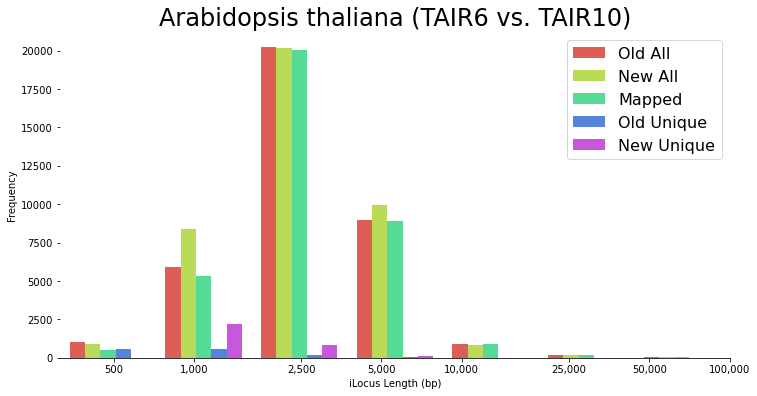

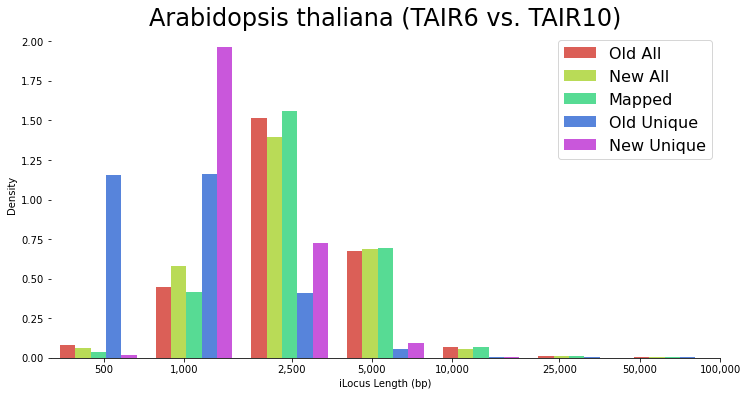

In [14]:
#Exploring whether either very short or very long iLoci are more prone to change ...
#TAIR6 mapped to TAIR10

mapped = []
matched_new = []

for key in qsrelationsAtt6['all']:
    mapped.append(key)
    for ilocus in qsrelationsAtt6['all'][key][1:]:
        matched_new.append(ilocus)    

Att6_iloci = set(ilociAtt6.LocusId)
Atha_iloci = set(ilociAtha.LocusId)

mapped = set(mapped)
matched_new = set(matched_new)
unique_old = Att6_iloci - mapped
unique_new = Atha_iloci - matched_new

Att6_mapped = ilociAtt6.loc[(ilociAtt6.LocusId.isin(mapped))]
Att6_unique = ilociAtt6.loc[(ilociAtt6.LocusId.isin(unique_old))]
Atha_unique = ilociAtha.loc[(ilociAtha.LocusId.isin(unique_new))]

data = [ilociAtt6['LogLength'], ilociAtha['LogLength'],
        Att6_mapped['LogLength'], Att6_unique['LogLength'], Atha_unique['LogLength']]
        
seaborn.set_context({"figure.figsize": (12, 6)})
plot = draw_hist(data, ylabel='Frequency', numbins=8, density=False,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 5.0),
          xticks=(2.7, 3.0, 3.4, 3.7, 4.0, 4.4, 4.7, 5.0),
          xticklabs=('500', '1,000', '2,500', '5,000', '10,000', '25,000', '50,000', '100,000'),
          Title="Arabidopsis thaliana (TAIR6 vs. TAIR10)")
plot = draw_hist(data, ylabel='Density', numbins=8, density=True,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 5.0),
          xticks=(2.7, 3.0, 3.4, 3.7, 4.0, 4.4, 4.7, 5.0),
          xticklabs=('500', '1,000', '2,500', '5,000', '10,000', '25,000', '50,000', '100,000'),
          Title="Arabidopsis thaliana (TAIR6 vs. TAIR10)")
plotfile = "../figures/LSB20GB-Fig6a.png"
plt.savefig(plotfile)
_ = plt.show()

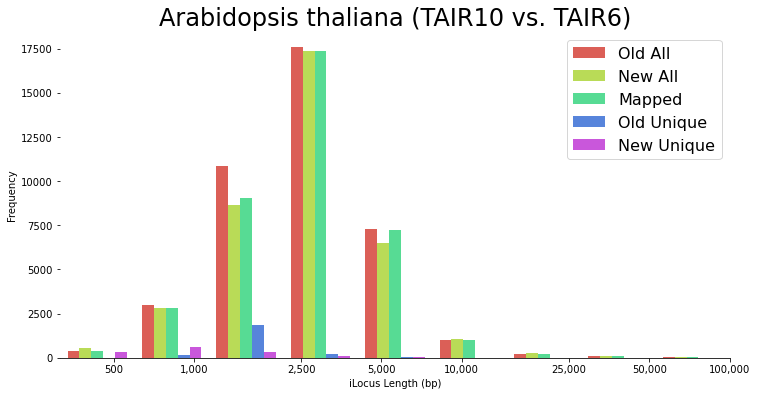

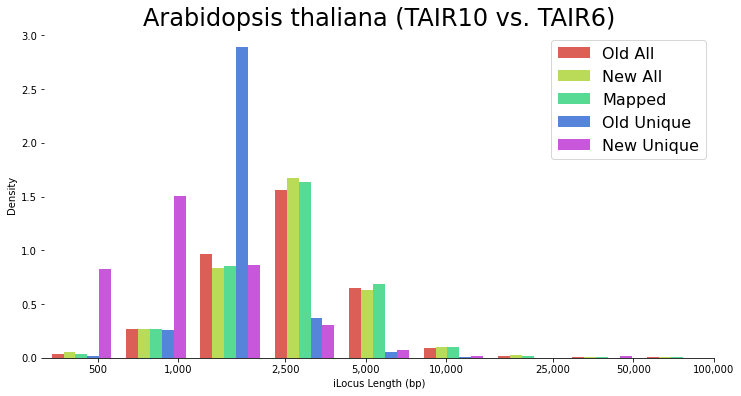

In [15]:
#... now checking the reverse mapping, TAIR10 onto TAIR6

mapped = []
matched_new = []

for key in qsrelationsAtha['all']:
    mapped.append(key)
    for ilocus in qsrelationsAtha['all'][key][1:]:
        matched_new.append(ilocus)

Atha_iloci = set(ilociAtha.LocusId)
Att6_iloci = set(ilociAtt6.LocusId)
mapped = set(mapped)
matched_new = set(matched_new)
unique_old = Atha_iloci - mapped
unique_new = Att6_iloci - matched_new

Atha_mapped = ilociAtha.loc[(ilociAtha.LocusId.isin(mapped))]
Atha_unique = ilociAtha.loc[(ilociAtha.LocusId.isin(unique_old))]
Att6_unique = ilociAtt6.loc[(ilociAtt6.LocusId.isin(unique_new))]

data = [ilociAtha['LogLength'], ilociAtt6['LogLength'],
        Atha_mapped['LogLength'], Atha_unique['LogLength'], Att6_unique['LogLength']]

seaborn.set_context({"figure.figsize": (12, 6)})
plot = draw_hist(data, ylabel='Frequency', numbins=10, density=False,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 5.0),
          xticks=(2.7, 3.0, 3.4, 3.7, 4.0, 4.4, 4.7, 5.0),
          xticklabs=('500', '1,000', '2,500', '5,000', '10,000', '25,000', '50,000', '100,000'),
          Title="Arabidopsis thaliana (TAIR10 vs. TAIR6)")
plot = draw_hist(data, ylabel='Density', numbins=10, density=True,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 5.0),
          xticks=(2.7, 3.0, 3.4, 3.7, 4.0, 4.4, 4.7, 5.0),
          xticklabs=('500', '1,000', '2,500', '5,000', '10,000', '25,000', '50,000', '100,000'),
          Title="Arabidopsis thaliana (TAIR10 vs. TAIR6)")
_ = plt.show()

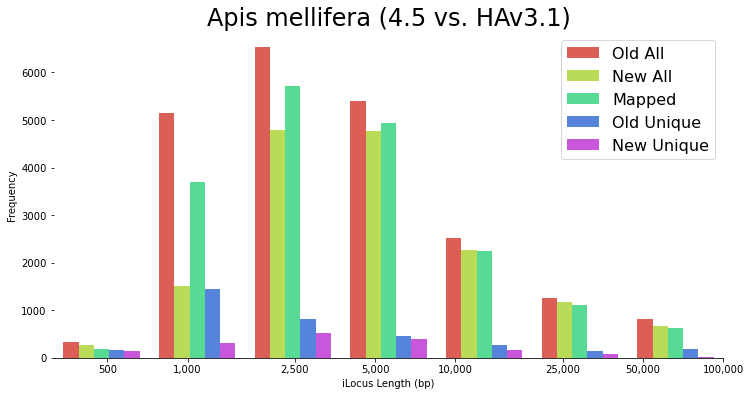

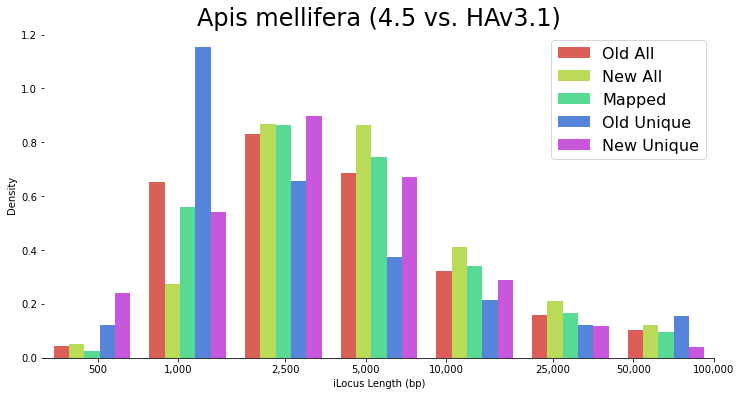

In [16]:
#... Apis mellifera Amel4.5 mapped onto AmelHAv3.1

mapped = []
matched_new = []

for key in qsrelationsAm45['all']:
    mapped.append(key)
    for ilocus in qsrelationsAm45['all'][key][1:]:
        matched_new.append(ilocus)

Am45_iloci = set(ilociAm45.LocusId)
Amel_iloci = set(ilociAmel.LocusId)
mapped = set(mapped)
matched_new = set(matched_new)
unique_old = Am45_iloci - mapped
unique_new = Amel_iloci - matched_new
Amel_mapped = ilociAm45.loc[(ilociAm45.LocusId.isin(mapped))]
Am45_unique = ilociAm45.loc[(ilociAm45.LocusId.isin(unique_old))]
Amel_unique = ilociAmel.loc[(ilociAmel.LocusId.isin(unique_new))]
data = [ilociAm45['LogLength'], ilociAmel['LogLength'],
        Amel_mapped['LogLength'], Am45_unique['LogLength'], Amel_unique['LogLength']]

seaborn.set_context({"figure.figsize": (12, 6)})
draw_hist(data, ylabel='Frequency', numbins=8, density=False,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 5.0),
          xticks=(2.7, 3.0, 3.4, 3.7, 4.0, 4.4, 4.7, 5.0),
          xticklabs=('500', '1,000', '2,500', '5,000', '10,000', '25,000', '50,000', '100,000'),
          Title="Apis mellifera (4.5 vs. HAv3.1)")
draw_hist(data, ylabel='Density', numbins=8, density=True,
          palette=seaborn.color_palette("hls", len(data)),
          xlabel='iLocus Length (bp)', xlim=(2.5, 5.0),
          xticks=(2.7, 3.0, 3.4, 3.7, 4.0, 4.4, 4.7, 5.0),
          xticklabs=('500', '1,000', '2,500', '5,000', '10,000', '25,000', '50,000', '100,000'),
          Title="Apis mellifera (4.5 vs. HAv3.1)")
plotfile = "../figures/LSB20GB-Fig6b.png"
plt.savefig(plotfile)
_ = plt.show()